# About the Company:

Bellabeat is a high-tech company that manufactures health-focused smart products that collect data on activity, sleep, stress, and reproductive health. This allows Bellabeat to empower women with knowledge about their own health and habits.

The main objective of this case study is to analyze Bellabeat's smart device fitness data to discover new methods and tips that would allow new growth opportunities for the Bellabeat users. The focus was set on the Bellabeat app.

# Scenario:

You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

# Ask

Key Questions:
- Who are the key stakelders?

The main stakeholders to inform the findings are Urška Sršen, a Bellabeat co-founder and Chief Creative Officer; Sando Mur, a Mathematician and Bellabeat’s other cofounder, and the rest of the Bellabeat marketing analytics team

- Questions asked by the stakeholder(s)

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?
    
- What is the Business Task?

The company wants growth opportunities for their Bellabeat ecosystem to further their products/services. They wish for high-level recommendations for their marketing strategy based on the trends seen in smart device usage

# Prepare

Determine the credibility of the data:

The data retrieved and utilized is a public data that came from the [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit). This is a dataset compromised of 30 FitBit users that gave their consent for their information/KPIs to be used. This datasets measures many factors like date, time, total steps, physical activity level, heart rate, sleep, and weight

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

In [3]:
activity$ActivityDate = as.POSIXct(activity$ActivityDate, format = "%m/%d/%Y", tz = Sys.timezone())
activity$Date <- format(activity$ActivityDate, format = "%m/%d/%Y")

sleep$SleepDay = as.POSIXct(sleep$SleepDay, format = "%m/%d/%Y %I:%M:%S %p", tz = Sys.timezone())
sleep$Date <- format(sleep$SleepDay, format = "%m/%d/%Y")

In [4]:
completedata = merge(activity, sleep, by = c("Id", "Date"))

# Process & Analyze

In [5]:
n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(sleep$Id)

[1] 33

[1] 33

[1] 24

In [6]:
# activity
activity %>%  
  select(TotalSteps,TotalDistance,SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, VeryActiveMinutes, Calories) %>%
  summary()

# calories
calories %>%
  select(Calories) %>%
  summary()

# sleep
sleep %>%
  select(TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes LightlyActiveMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :  0.0       
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:127.0       
 Median : 7406   Median : 5.245   Median :1057.5   Median :199.0       
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :192.8       
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:264.0       
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :518.0       
 FairlyActiveMinutes VeryActiveMinutes    Calories   
 Min.   :  0.00      Min.   :  0.00    Min.   :   0  
 1st Qu.:  0.00      1st Qu.:  0.00    1st Qu.:1828  
 Median :  6.00      Median :  4.00    Median :2134  
 Mean   : 13.56      Mean   : 21.16    Mean   :2304  
 3rd Qu.: 19.00      3rd Qu.: 32.00    3rd Qu.:2793  
 Max.   :143.00      Max.   :210.00    Max.   :4900  

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

 TotalMinutesAsleep TotalTimeInBed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.0  
 Median :433.0      Median :463.0  
 Mean   :419.5      Mean   :458.6  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

There were some key takeaways
- The average sedentary time was 991 minutes or 16 hours and 31 minutes (this includes sleep time)
- The maximum sedentary time was 1440 minutes, 24 hours, or the whole day
- The average and max minutes for "very active" is higher than "fairly active"

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


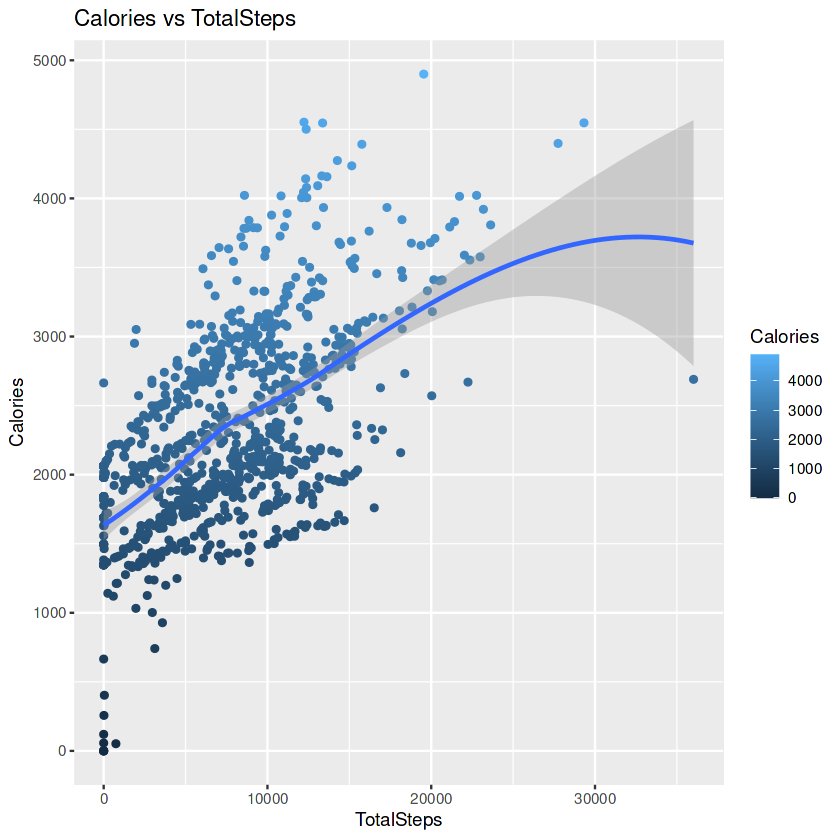

In [7]:
ggplot(data = activity, aes(x = TotalSteps, y = Calories)) + 
  geom_point(aes(color = Calories)) + geom_smooth() + labs(title = "Calories vs TotalSteps")

There seems to be a positive correlation between Calories and Total Steps. This is the case since the more active we are with, the more calories that are burned off.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


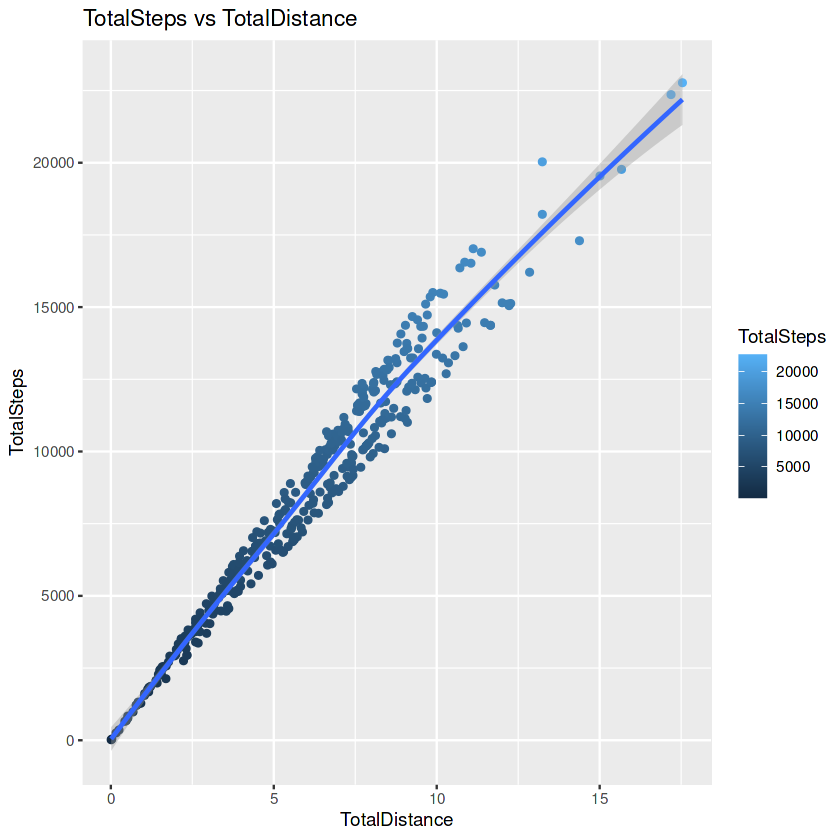

In [8]:
ggplot(data = completedata, aes(x = TotalDistance, y = TotalSteps)) +
    geom_point(aes(color = TotalSteps)) + geom_smooth() + labs(title = 'TotalSteps vs TotalDistance')

There is a strong positive correlation between Total Steps and Total Distance. There seems to be little to no outliers in this connection.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


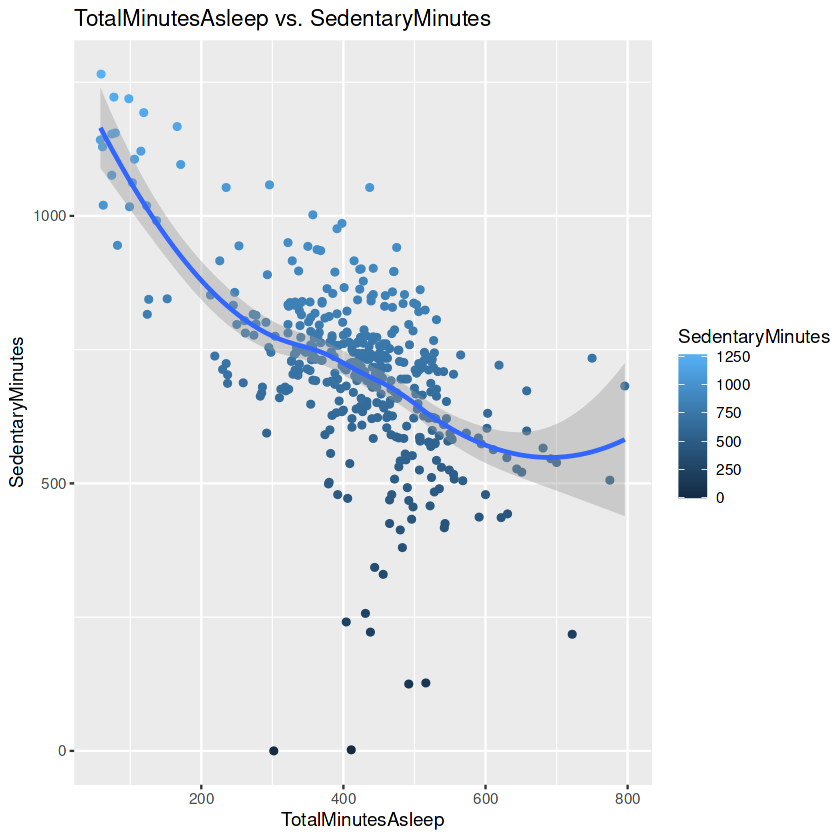

In [9]:
ggplot(data = completedata, aes(x = TotalMinutesAsleep, y = SedentaryMinutes)) + 
geom_point(aes(color = SedentaryMinutes)) + geom_smooth() +
  labs(title = "TotalMinutesAsleep vs. SedentaryMinutes")

There is a weak negative connection between Sedentary Minutes and Total Minutes of Sleep. It cannot be fully infered for causation as there can be other factors in play.

# Share & Act

Based on the information, data, and analysis I have recieved, there are a few recommended ideas that the marketing straegies team can implent to their customers
- It is seen that the more steps a person takes per day, the higher amount of calories burned. The average amount was set at 7,638. This can be increase by recommending a 5-15 min walk after eating a meal (breakfast, lunch, and/or dinner). It won't increase the calories burned by a lot, but it will add up over time
- The marketing team can suggest taking 5-10 minute walks while at work to reduce stress levels and get some light activity in
- The app can give its users a little notification to reduce the amount of phone, tablet, computer, or tv use when in bed to increase the amount of sleep a person can get
- Since this is a women's product/service, the marketing team can start implementing menstraul cycles within the activity plan to be more flexible with performance